In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [7]:
df=pd.read_csv("C:/TMLC/PROJECT 10 (NLP)/Dataset/twitter_parsed_dataset.csv")
df.head()

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


In [8]:
eda=df
eda.drop(['index', 'id'], axis=1, inplace=True)
eda

,Text,Annotation,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,#mkr No No No No No No,none,0.0
...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",none,0.0
16847,#MKR 'pretty good dishes we're happy with' - O...,none,0.0
16848,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0


In [9]:
eda.isna().sum()

Text          1
Annotation    3
oh_label      3
dtype: int64

In [10]:
eda.dropna(inplace=True)

In [11]:
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')
eda['stopwords'] = eda['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
eda[['Text','stopwords']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shrir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Text,stopwords
0,@halalflaws @biebervalue @greenlinerzjm I read...,4
1,@ShreyaBafna3 Now you idiots claim that people...,9
2,"RT @Mooseoftorment Call me sexist, but when I ...",7
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",4
4,#mkr No No No No No No,0


In [12]:
eda
#displaying stopwords

,Text,Annotation,oh_label,stopwords
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0,4
1,@ShreyaBafna3 Now you idiots claim that people...,none,0.0,9
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0,7
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0,4
4,#mkr No No No No No No,none,0.0,0
...,...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",none,0.0,10
16847,#MKR 'pretty good dishes we're happy with' - O...,none,0.0,2
16848,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0,3
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0,3


In [13]:

eda['tag'] = eda['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
eda[['Text','tag']].head()

,Text,tag
0,@halalflaws @biebervalue @greenlinerzjm I read...,3
1,@ShreyaBafna3 Now you idiots claim that people...,1
2,"RT @Mooseoftorment Call me sexist, but when I ...",1
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1
4,#mkr No No No No No No,0


In [14]:
eda['Text'] = eda['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
eda['Text'].head()
#converting to lowercase

0    @halalflaws @biebervalue @greenlinerzjm i read...
1    @shreyabafna3 now you idiots claim that people...
2    rt @mooseoftorment call me sexist, but when i ...
3    @g0ssipsquirrelx wrong, isis follows the examp...
4                               #mkr no no no no no no
Name: Text, dtype: object

In [15]:
eda['Text'] = eda['Text'].str.replace(r'@\w+', '', regex=True)
eda['Text'].head()

0       i read them in context.no change in meaning...
1     now you idiots claim that people who tried to...
2    rt  call me sexist, but when i go to an auto p...
3     wrong, isis follows the example of mohammed a...
4                               #mkr no no no no no no
Name: Text, dtype: object

In [16]:
eda['Text'] = eda['Text'].str.replace(r'[@#]\w+', '', regex=True)
eda['Text'].head()


0       i read them in context.no change in meaning...
1     now you idiots claim that people who tried to...
2    rt  call me sexist, but when i go to an auto p...
3     wrong, isis follows the example of mohammed a...
4                                    no no no no no no
Name: Text, dtype: object

In [17]:
eda['Text'] = eda['Text'].str.replace(r'\brt\b', '', regex=True, case=False)
eda['Text'].head()


0       i read them in context.no change in meaning...
1     now you idiots claim that people who tried to...
2      call me sexist, but when i go to an auto pla...
3     wrong, isis follows the example of mohammed a...
4                                    no no no no no no
Name: Text, dtype: object

In [18]:
eda['Text'] = eda['Text'].str.replace(r'http[s]?://\S+', '', regex=True, case=False)
eda['Text'].head()


0       i read them in context.no change in meaning...
1     now you idiots claim that people who tried to...
2      call me sexist, but when i go to an auto pla...
3     wrong, isis follows the example of mohammed a...
4                                    no no no no no no
Name: Text, dtype: object

In [19]:

# Remove punctuation and replace it with a space
df['Text'] = df['Text'].str.replace('[^\w\s]', ' ', regex=True)

# Convert text to lowercase
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View the first few rows
df['Text'].head()


0    i read them in context no change in meaning th...
1    now you idiots claim that people who tried to ...
2    call me sexist but when i go to an auto place ...
3    wrong isis follows the example of mohammed and...
4                                    no no no no no no
Name: Text, dtype: object

In [20]:
eda.head()

,Text,Annotation,oh_label,stopwords,tag
0,i read them in context no change in meaning th...,none,0.0,4,3
1,now you idiots claim that people who tried to ...,none,0.0,9,1
2,call me sexist but when i go to an auto place ...,sexism,1.0,7,1
3,wrong isis follows the example of mohammed and...,racism,1.0,4,1
4,no no no no no no,none,0.0,0,0


In [21]:
#removing stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
eda['Text'] = eda['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
eda['Text'].head()

0    read context change meaning history islamic sl...
1    idiots claim people tried stop becoming terror...
2            call sexist go auto place rather talk guy
3    wrong isis follows example mohammed quran exactly
4                                                     
Name: Text, dtype: object

In [22]:
# Remove numbers from the 'Text' column in your dataset
eda['Text'] = eda['Text'].str.replace(r'\d+', '', regex=True)
eda['Text'].head()


0    read context change meaning history islamic sl...
1    idiots claim people tried stop becoming terror...
2            call sexist go auto place rather talk guy
3    wrong isis follows example mohammed quran exactly
4                                                     
Name: Text, dtype: object

In [23]:
def remove_url(text): 
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
# remove all urls from df
import re
import string
eda['Text'] = eda['Text'].apply(lambda x: remove_url(x))

In [24]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
# remove all html tags from df
eda['Text'] = eda['Text'].apply(lambda x: remove_html(x))

In [25]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text): 
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
#Example
remove_emoji("Omg another Earthquake 😔😔")
eda['Text'] = eda['Text'].apply(lambda x: remove_emoji(x))

In [26]:
from textblob import TextBlob
eda['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    read context change meaning history islamic sl...
1    idiot claim people tried stop becoming terrori...
2             call exist go auto place rather talk guy
3      wrong iris follows example mohammed ran exactly
4                                                     
Name: Text, dtype: object

In [27]:
import nltk
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each word in the sentence
eda['Text'] = eda['Text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

# View the first few rows
eda['Text'].head()


0    read context change meaning history islamic sl...
1    idiot claim people tried stop becoming terrori...
2            call sexist go auto place rather talk guy
3     wrong isi follows example mohammed quran exactly
4                                                     
Name: Text, dtype: object

In [28]:
eda.head()

,Text,Annotation,oh_label,stopwords,tag
0,read context change meaning history islamic sl...,none,0.0,4,3
1,idiot claim people tried stop becoming terrori...,none,0.0,9,1
2,call sexist go auto place rather talk guy,sexism,1.0,7,1
3,wrong isi follows example mohammed quran exactly,racism,1.0,4,1
4,,none,0.0,0,0


Visualization 

<Axes: >

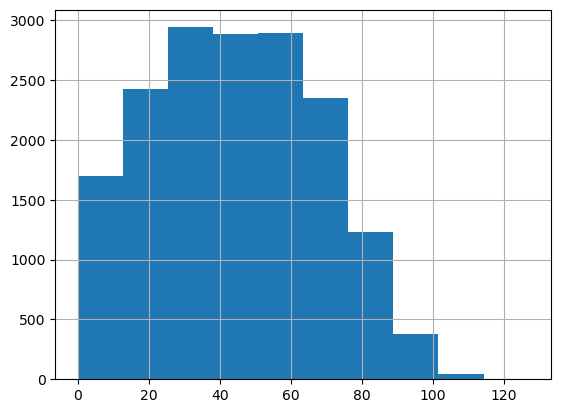

In [29]:
eda['Text'].str.len().hist()
#showing us the number of characters in each tweet

<Axes: >

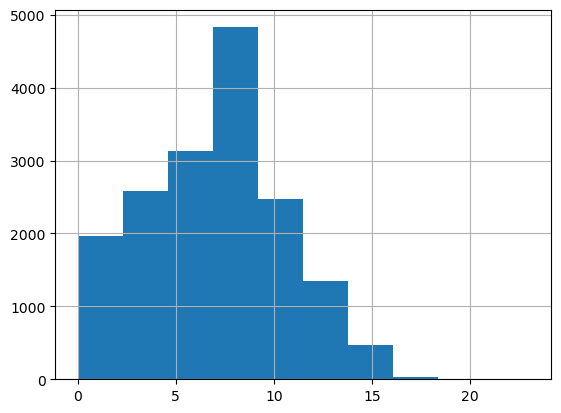

In [30]:
eda['Text'].dropna().str.split().map(len).hist()
#showing us the number of words in each tweet:  words range from 1->31

In [31]:
eda.dropna(subset=['Text'], inplace=True)

C:\Users\shrir\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shrir\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: >

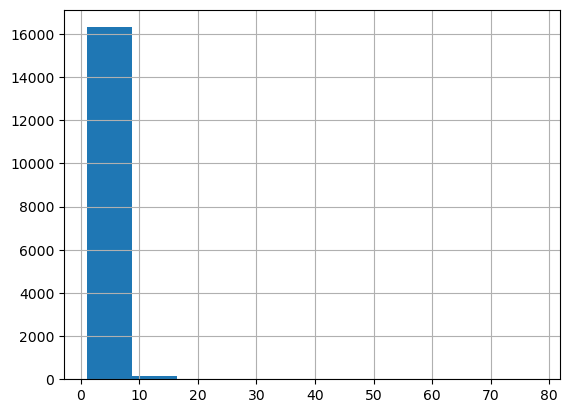

In [32]:
eda['Text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
#showing us the average word length in each tweet:  words range from 1->10
#small length stopwords cause this graph to be left-skewed

<BarContainer object of 10 artists>

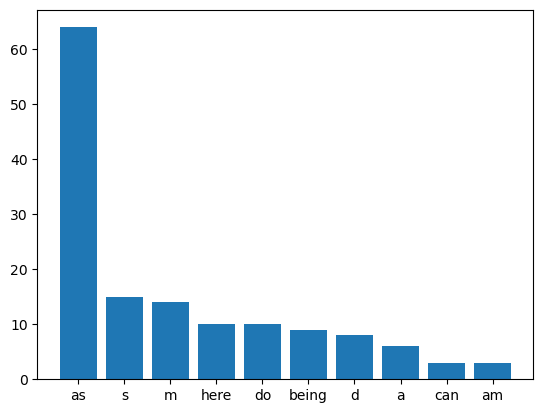

In [33]:
from nltk.corpus import stopwords
corpus=[]
new= eda['Text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
stop=set(stopwords.words('english'))
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)
#showing us the top 10 stopwords in the tweets

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

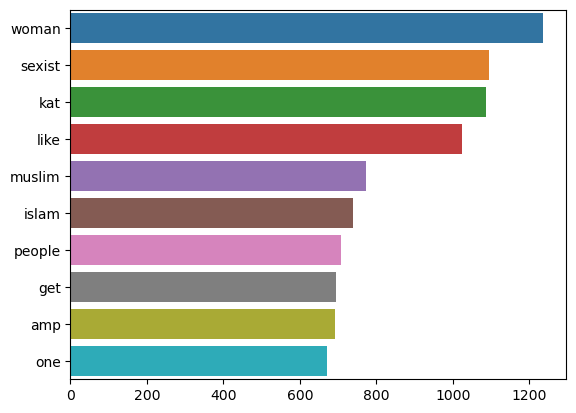

In [34]:
import collections
import seaborn as sns
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []

for word, count in most[:10]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y, y=x)
#showing us the most common words in the tweets without stopwords

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

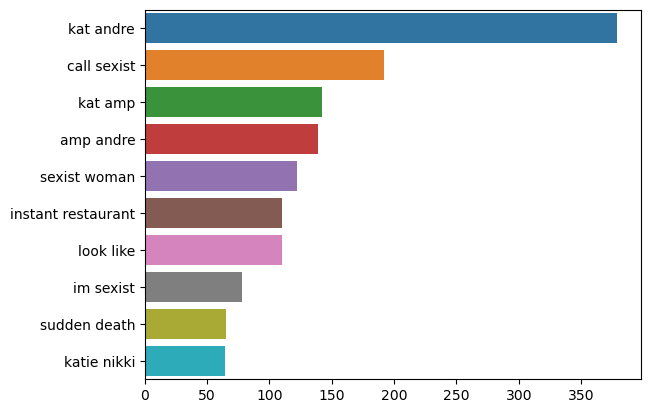

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams  

def get_top_ngram(corpus, n=None):
    vec=CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(eda['Text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
#showing us the top 10 bigrams in the tweets

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

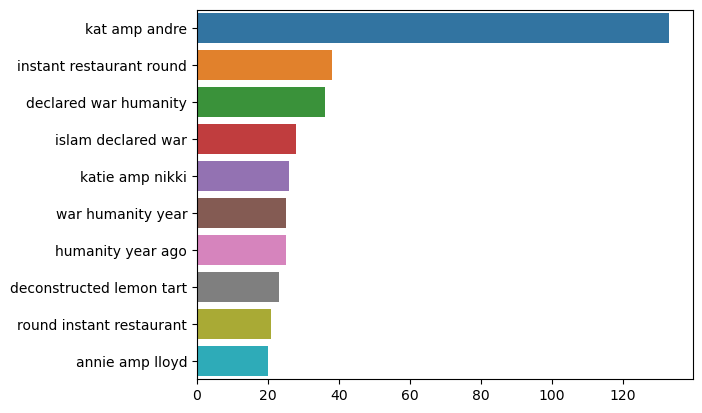

In [36]:
top_n_bigrams=get_top_ngram(eda['Text'],3)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group.

In [37]:
eda=df
eda.dropna(subset=['Text'], inplace=True)
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in eda['Text']:
        words=[w for w in word_tokenize(news) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

corpus=preprocess_news(eda)
#tokenization and lemmatization

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
# Import the necessary library
import pyLDAvis.gensim
import gensim

# Assuming you have a corpus defined somewhere
# Create a dictionary using gensim
dic = gensim.corpora.Dictionary(corpus)

# Create a bag of words (BoW) corpus
bow_corpus = [dic.doc2bow(doc) for doc in corpus]


In [39]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.036*"woman" + 0.032*"sexist" + 0.011*"like" + 0.011*"men" + 0.009*"call" + 0.009*"girl" + 0.008*"female" + 0.007*"make" + 0.006*"know" + 0.005*"say"'),
 (1,
  '0.036*"kat" + 0.017*"andre" + 0.016*"amp" + 0.008*"like" + 0.008*"get" + 0.007*"cook" + 0.007*"girl" + 0.007*"think" + 0.006*"one" + 0.006*"well"'),
 (2,
  '0.006*"time" + 0.006*"tweet" + 0.006*"one" + 0.005*"people" + 0.005*"like" + 0.005*"see" + 0.005*"would" + 0.004*"think" + 0.004*"today" + 0.004*"yeah"'),
 (3,
  '0.024*"muslim" + 0.020*"islam" + 0.010*"people" + 0.008*"like" + 0.007*"get" + 0.007*"isi" + 0.006*"religion" + 0.006*"quran" + 0.006*"mohammed" + 0.006*"one"')]

In [40]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.007465 -0.174866       1        1  26.910153
3      0.156370  0.126692       2        1  26.205825
1     -0.201820  0.092902       3        1  24.520236
2      0.052914 -0.044728       4        1  22.363787, topic_info=       Term         Freq        Total Category  logprob  loglift
45    woman  1119.000000  1119.000000  Default  30.0000  30.0000
114     kat  1008.000000  1008.000000  Default  29.0000  29.0000
23   sexist   992.000000   992.000000  Default  28.0000  28.0000
72   muslim   714.000000   714.000000  Default  27.0000  27.0000
111   andre   468.000000   468.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
270    want    77.878868   409.445200   Topic4  -5.7890  -0.1619
272     yes    66.524952   181.105232   Topic4  -5.9466   0.4962
319  really    69.118014   345.948007   Topic4  -5.9083  -0.1127
251    even    67.817947   289.452125   Topic4  -5.9273   0.0466
289    ever    65.737255   217.602763   Topic4  -5.9585   0.3007

[287 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
303       2  0.163065  actually
303       3  0.231009  actually
303       4  0.604701  actually
110       1  0.061333       amp
110       2  0.095931       amp
...     ...       ...       ...
41        3  0.035009      year
41        4  0.206163      year
272       1  0.623947       yes
272       2  0.011043       yes
272       4  0.369951       yes

[476 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

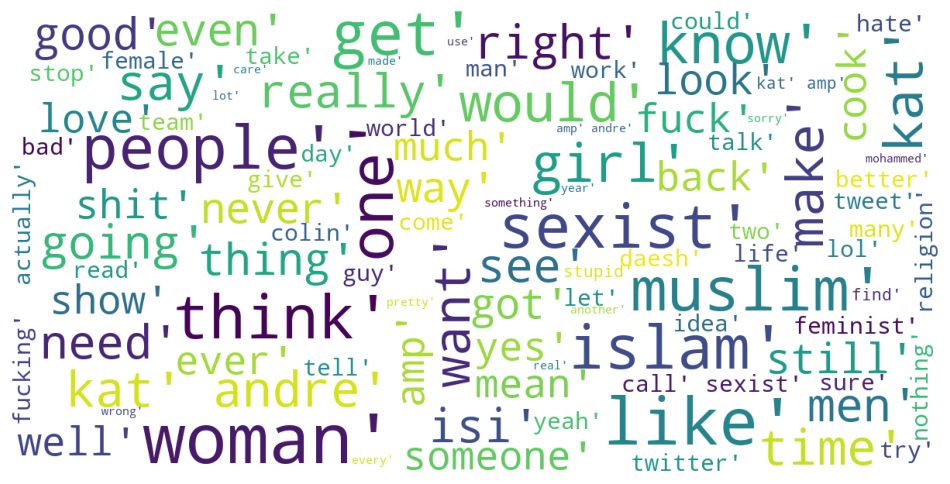

In [41]:
#wordcloud

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

<Axes: >

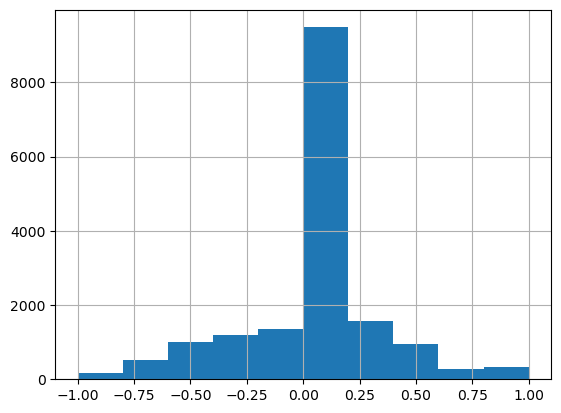

In [42]:
#Textblob used for sentiment analysis
from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity

eda['polarity_score']=eda['Text'].apply(lambda x : polarity(x))
eda['polarity_score'].hist()
#PLOT INDICATES THAT THE TWEETS ARE MOSTLY NEUTRAL

<BarContainer object of 3 artists>

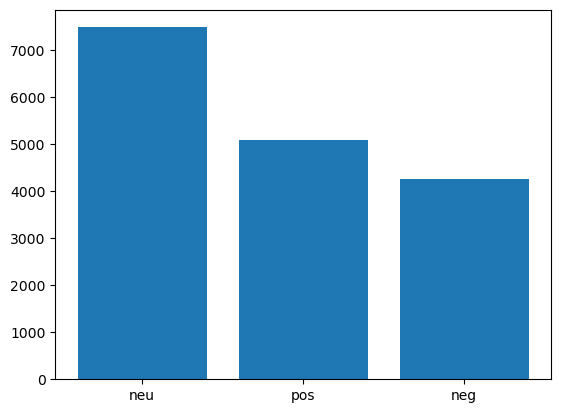

In [43]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

eda['polarity']=eda['polarity_score'].map(lambda x: sentiment(x))

plt.bar(eda.polarity.value_counts().index,
        eda.polarity.value_counts())

Word EMbeddings using  TF-IDF

In [44]:
eda

,Text,Annotation,oh_label,stopwords,tag,polarity_score,polarity
0,read context change meaning history islamic sl...,none,0.0,4,3,0.000000,neu
1,idiot claim people tried stop becoming terrori...,none,0.0,9,1,-0.183333,neg
2,call sexist go auto place rather talk guy,sexism,1.0,7,1,0.000000,neu
3,wrong isi follows example mohammed quran exactly,racism,1.0,4,1,-0.125000,neg
4,,none,0.0,0,0,0.000000,neu
...,...,...,...,...,...,...,...
16846,feeling sorry girl safe kat andre going home,none,0.0,10,0,0.000000,neu
16847,pretty good dish happy ok well never eating place,none,0.0,2,0,0.562500,pos
16848,deconstructed lemon tart please go one season ...,none,0.0,3,1,0.000000,neu
16849,stupid talk blocked,none,0.0,3,3,-0.800000,neg


In [45]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import seaborn as sns

# # using TfidfVectorizer with all default parameters except 'max_features = 2500'
# tfidf_1 = TfidfVectorizer(input = "content", encoding = "utf-8", decode_error = "strict",
#                           strip_accents = None, lowercase = True, preprocessor = None,
#                           tokenizer = None, analyzer = "word", stop_words = None,
#                           token_pattern = r"(?u)\b\w\w+\b", ngram_range = (1,1),
#                           max_df = 1.0, min_df = 1, max_features = 2500, vocabulary = None,
#                           binary = False, dtype = np.float64, norm = "l2", use_idf = True,
#                           smooth_idf = True, sublinear_tf = False)

# tfidf_1.fit(eda["Text"])
# tfidf_1_array = tfidf_1.transform(eda["Text"]).toarray()

# twitter_tfidf1 = pd.DataFrame(tfidf_1_array, columns = tfidf_1.get_feature_names_out())
# twitter_tfidf1.head()

In [46]:
# twitter_tfidf1.columns

In [47]:
eda.drop(columns=['stopwords', 'tag', 'polarity', 'polarity_score'], inplace=True)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 

# It doesn't really matter what the function name is called
# but the `train_test_split` is splitting up the data into 
# 2 parts according to the `test_size` argument you've set.

# When we're splitting up the training data, we're spltting up 
# into train, valid split. The function name is just a name =)
train, valid = train_test_split(eda, test_size=0.2)

In [49]:
train

,Text,Annotation,oh_label
14153,pete evans look orange,none,0.0
16226,garrison rad committed upkeep,none,0.0
15645,dessert one mouthful,none,0.0
2331,going mass mute mass block gamergate would pre...,none,0.0
7296,well kat amp andre tell go f ck guess already ...,none,0.0
...,...,...,...
2823,true love defined islam,none,0.0
4406,hope kat andre eliminated next make happen,none,0.0
3332,hey kat andre served soggy bread suckkkkers rofl,none,0.0
7354,christian yezidis woman scumbag,none,0.0


In [50]:
X_train = train['Text']
X_val = valid['Text']
y_train = train['oh_label']
y_val = valid['oh_label']

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Fit and transform the training text
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the validation text
X_val_vectorized = vectorizer.transform(X_val)


In [52]:
clf=LogisticRegression()
clf.fit(X_train_vectorized, y_train)

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LogisticRegression()

In [53]:
# Predict on validation data
y_pred = clf.predict(X_val_vectorized)


In [54]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')


Validation Accuracy: 0.8252


c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d

In [55]:
# import joblib
# joblib.dump(clf, 'model.pkl')

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_vectorized, y_train)

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestClassifier()

In [57]:
rf_pred = rf.predict(X_val_vectorized)


In [58]:
# Calculate accuracy
accuracy = accuracy_score(y_val, rf_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.8288


c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d

In [91]:
text = ["I am sexist today"]
text_vectorized = vectorizer.transform(text)
rf.predict(text_vectorized)


array([1.])

In [74]:
import joblib
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [92]:
import joblib
joblib.dump(rf, 'model_rf.pkl')

['model_rf.pkl']

In [89]:
# Define your custom text
custom_text = ["Trump is a racist and sexist pig"]

# Preprocess and vectorize the custom text
custom_text_vectorized = vectorizer.transform(custom_text)

In [90]:
# Make predictions
predicted_label = clf.predict(custom_text_vectorized)
print(f"Predicted label: {predicted_label}")


Predicted label: [0.]


In [82]:
# Create a SHAP explainer based on your model type (TreeExplainer for tree-based models, etc.)
import shap
explainer = shap.KernelExplainer(clf.predict_proba, vectorizer.transform(pd.DataFrame(X_train)))

# Calculate SHAP values for the custom text
shap_values = explainer.shap_values(custom_text_vectorized)

# Visualize the SHAP force plot for the custom text
shap.initjs()  # Enables JavaScript visualizations
shap.force_plot(explainer.expected_value[0], shap_values[0], custom_text_vectorized.toarray()[0])


  0%|          | 0/1 [00:00<?, ?it/s]

In [95]:
joblib.dump(explainer, 'explainer.pkl')

['explainer.pkl']

In [83]:
# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Get SHAP values for the positive class (assuming binary classification)
shap_word_values = shap_values[1][0]

# Create a DataFrame to map words to their SHAP values
shap_df = pd.DataFrame({
    'word': words,
    'shap_value': shap_word_values
})

# Sort words by the magnitude of SHAP values (most impactful)
shap_df = shap_df.sort_values(by='shap_value', ascending=False)

# Display the top words contributing to the prediction
print(shap_df.head(3))


        word  shap_value
3902  sexist    0.397277
3539  racist    0.066765
3292     pig    0.062474


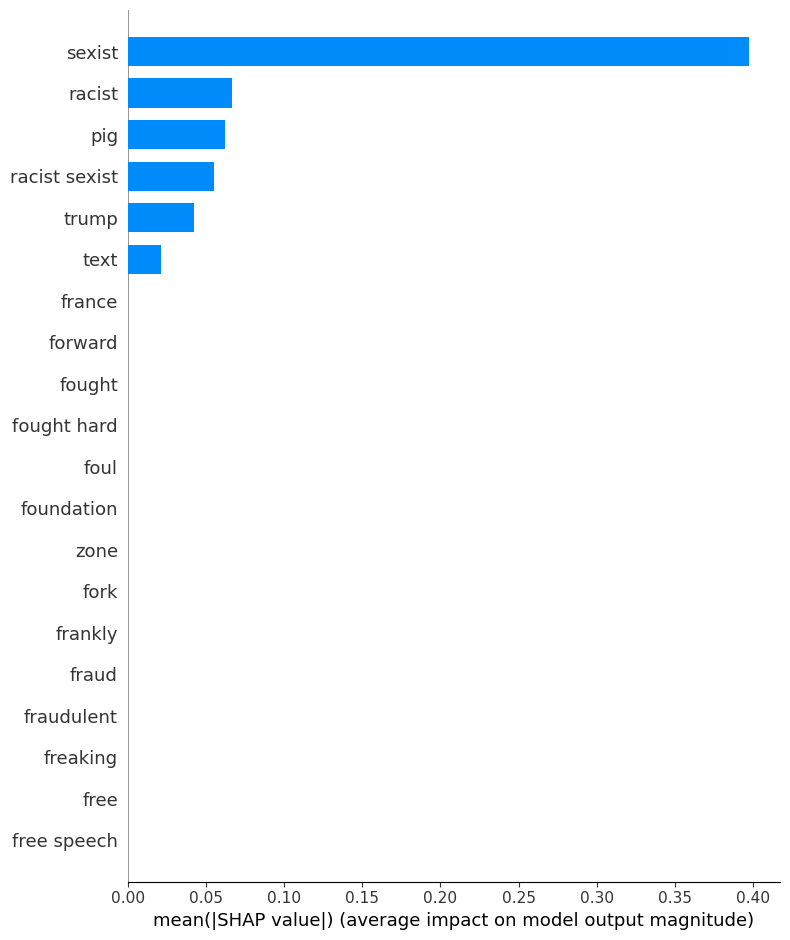

In [84]:
# Visualize the top words contributing to the prediction
shap.initjs()  # Enable JS visualization in the notebook

# Create a bar plot showing the most important words for the prediction
shap.summary_plot(shap_values[1], custom_text_vectorized, feature_names=words, plot_type="bar")


In [93]:
# Load the classifier and vectorizer
import joblib
rf = joblib.load("C:/TMLC/PROJECT 10 (NLP)/Notebook/model_rf.pkl")
vectorizer = joblib.load("C:/TMLC/PROJECT 10 (NLP)/Notebook/vectorizer.pkl")

In [94]:
text=["I am sexist today"]
text_vectorized = vectorizer.transform(text)
label=rf.predict(text_vectorized)
print(label[0])

1.0
